In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import arviz as az

## Easy

__4E1__

The likelihood is line 1: $y_i \sim Normal(\mu, \sigma)$

__4E2__

There are two parameters ($\mu$ and $\sigma$) in the model:


\begin{align}
y_i &\sim Normal(\mu, \sigma) \\
\mu &\sim Normal(0, 10) \\
\sigma &\sim Exponential(1)
\end{align}


__4E3__

$$ Pr(\mu, \sigma | y) = \frac{Normal(y|\mu, \sigma) Normal(\mu|0, 10)Exponential(\sigma|1)}
{\int\int Normal(y|\mu, sigma)Normal(\mu|0, 10)Exponential(\sigma|1)d\mu d\sigma}$$

__4E4__

The linear model is in the second line: $\mu_i = \alpha + \beta x_i$

__4E5__

The model below has three parameters: $\alpha, \beta$ and $\sigma $:
\begin{align}
y_i &\sim Normal(\mu, \sigma) \\
\mu &= \alpha + \beta x_i \\
\alpha &\sim Normal(0, 10) \\
\beta &\sim Normal(0,1) \\
\sigma &\sim Exponential(2)
\end{align}



## Medium

__4M1__

In [37]:
size = 10000
sample_mu = stats.norm.rvs(0, 10, size)
sample_sigma = stats.expon.rvs(1, size=size)
sample_y = stats.norm.rvs(sample_mu, sample_sigma, size)

<AxesSubplot:>

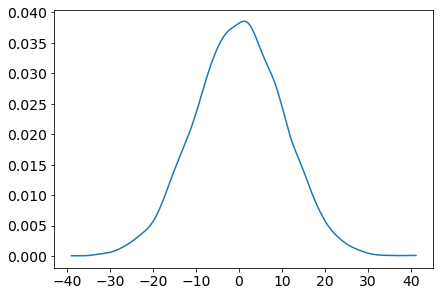

In [38]:
az.plot_kde(sample_y)

__4M2__ 

_Skipping because it is specific to R users._

__4M3__

\begin{align}
y_i &\sim Normal(\mu, sigma) \\
\mu &= \alpha + \beta x_i \\
\alpha &\sim Normal(0, 10) \\
\beta &\sim Uniform(0, 1) \\
\sigma &\sim Exponential(1)
\end{align}